In [1]:
import datetime as dt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_SONEL

%matplotlib inline

In [2]:
datum = 'dNUUK_43013M001_NGL14.neu'
dir_in = 'data/GPS'

In [3]:
pattern = os.path.join(dir_in, datum)
print(pattern)

data/GPS\dNUUK_43013M001_NGL14.neu


In [4]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [5]:
for f, filepath in enumerate(filenames):
    df = read_GPS_SONEL(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\dNUUK_43013M001_NGL14.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                             
2008-09-30  -47.0  75.8     -31.1       3.3      2.3          5.4
2008-10-02  -47.3  76.9     -28.8       2.1      1.4          3.5
2008-10-03  -46.3  76.4     -27.5       2.1      1.4          3.5
2009-01-01  -43.1  74.3     -35.0       2.1      1.4          3.4
2009-01-02  -42.6  74.4     -36.5       2.1      1.4          3.5


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, var, site, window):  
    
    decomposition = seasonal_decompose(df[var], period = window)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    Amplitude = max(seasonal) - min(seasonal)
    
    decomposition.plot();
    df['denoised'] = df[var] - residual
    df['trend'] = trend
    #print(f'\n\n{filepath}')
    print(df.head())
    #print(f'{site} Seasonal Amplitude =', Amplitude)
    #seasonal_amp = pd.DataFrame(list(zip(list({site}), list(Amplitude))),
                           # colums = ['Site_Name', 'Seasonal_Amplitude'])
    #seasonal_amp.to_csv('GPS_Seasonal_Amplitude_SONEL')

# Change Point Detection
def change_pt_detection(df, var, points):
    model = "l1"  
    algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
    my_bkps = algo.predict(n_bkps=10)

    
def change_pt_plot()
    rpt.show.display(points, my_bkps, figsize=(10, 6))
    plt.suptitle(f"{site}Change Point Detection")
    plt.show()

In [7]:
def test_calc_OLS(df, var, start, end):
    df = df[start:end]
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    return res

def test_plot_OLS(df, res, res2, site, var, trend_array, trend_array2, start, end, start2, end2):
    df1 = df[start:end]
    df2 = df[start2:end2]
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df1[var].dropna().index, df1[var].dropna().values, 
            label='trend', marker='.', linestyle='', color = 'darkgrey')
    ax.plot(df1[var].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df1[var].dropna()))], 
            marker = '.', linestyle = '', color = 'purple')
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    # ax[1].set_title("Residuals");
    ax.plot(df2[var].dropna().index, df2[var].dropna().values, 
            label='trend', marker='.', linestyle='', color = 'darkgrey')
    ax.plot(df2[var].dropna().index, [res2.params.x1*i + res2.params.const for i in np.arange(len(df2[var].dropna()))],
           marker = '.', linestyle = '', color = 'purple')
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    plt.axvline(dt.datetime(2007, 9, 7), color= 'red', linestyle='--')
    ax.set_title(f"Trend {start}:{end} = {trend_array * 1:.2f} mm/yr, Trend {start2}:{end2} = {trend_array2 * 1:.2f} mm/yr");
    # ax[1].set_title("Residuals");
    plt.suptitle(f"{site}")
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    
    



data/GPS\dNUUK_43013M001_NGL14.neu
f: 0
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2008-09-30  -47.0  75.8     -31.1       3.3      2.3          5.4       NaN   
2008-10-02  -47.3  76.9     -28.8       2.1      1.4          3.5       NaN   
2008-10-03  -46.3  76.4     -27.5       2.1      1.4          3.5       NaN   
2009-01-01  -43.1  74.3     -35.0       2.1      1.4          3.4       NaN   
2009-01-02  -42.6  74.4     -36.5       2.1      1.4          3.5       NaN   

            trend  
Year               
2008-09-30    NaN  
2008-10-02    NaN  
2008-10-03    NaN  
2009-01-01    NaN  
2009-01-02    NaN  


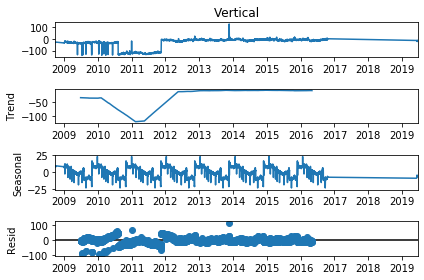

In [30]:
for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    df = read_GPS_SONEL(filepath)
    df = decompose(df, 'Vertical', filepath[-24:-20], 365)
    

In [9]:
def convert_trend_toyearly(df, res):
    
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend

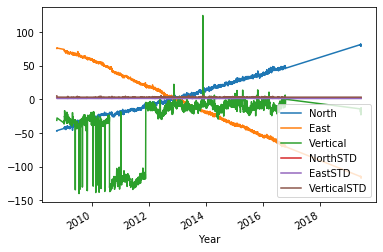

In [10]:
df = read_GPS_SONEL(filepath)
df.plot()



data/GPS\dNUUK_43013M001_NGL14.neu
f: 0
Trend 1 = 0.81 mm/yr
                            OLS Regression Results                            
Dep. Variable:               Vertical   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     43.28
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           6.22e-11
Time:                        10:31:13   Log-Likelihood:                -6062.3
No. Observations:                1781   AIC:                         1.213e+04
Df Residuals:                    1779   BIC:                         1.214e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

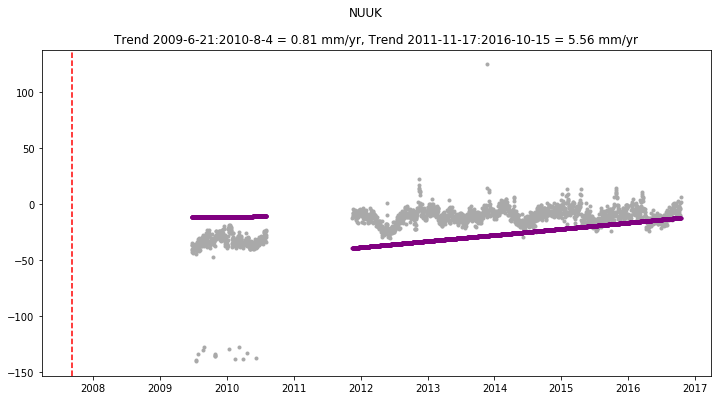

In [31]:
sonel_trend_array = np.full(np.shape(filenames)[0], np.nan)
sonel_trend_array2 = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_SONEL(filepath)
    
    # Get trend using linear regression
    res2 = test_calc_OLS(df, 'Vertical', '2009-6-21', '2010-8-4')
    sonel_trend_array2[f] = convert_trend_toyearly(df, res2)
    
    res = test_calc_OLS(df, 'Vertical', '2011-11-17','2016-10-15')
    sonel_trend_array[f] = convert_trend_toyearly(df, res)
    
    # Save site name
    site_name_array.append(filepath[-24:-20])
    
    print(f"Trend 1 = {sonel_trend_array[f] * 1:.2f} mm/yr")
    print(res.summary())
    print(f"Trend 2 = {sonel_trend_array2[f] * 1:.2f} mm/yr")
    print(res2.summary())
   # np.savetxt('GPS_trend.csv', {sonel_trend_array[f] * 365:.2f}, delimiter=',')
   
    # Make Plot
    test_plot_OLS(df, res, res2, filepath[-24:-20], 'Vertical', sonel_trend_array[f], sonel_trend_array2[f], '2009-6-21', '2010-8-4', '2011-11-17','2016-10-15')
    